In [34]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import (StratifiedKFold, cross_val_score, cross_val_predict,
                                      train_test_split)
from sklearn import datasets

class proba_logreg(LogisticRegression):
    def predict(self, X):
        return LogisticRegression.predict_proba(self, X)

# setup data
import pandas
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
df = pandas.read_csv( '../data_sets/experimental/expr_144_mutants.csv', index_col=0 )
f = pandas.read_csv( '../data_sets/rosetta/enzyme_design_talaris_2013.csv' )
f = f.groupby( 'name' ).apply( lambda x: x.sort_values( 'total_score' ).head( 10 ).mean() )
J = df.join( f ).dropna()

y = J.expression
X = J.drop( 'expression', axis=1 ) 
X = scaler.fit_transform( X ) 

In [37]:

# setup model
cv = StratifiedKFold(y, 10)
logreg = LogisticRegression( class_weight='balanced' )

# # cross-validation scores
scores = cross_val_score(logreg, X, y, cv=cv)
preds = cross_val_predict( logreg, X, y, cv=cv)

# # # predict probabilities
# # Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
# # logreg.fit(Xtrain, ytrain)
# # proba = logreg.predict_proba(Xtest)
print scores, scores.mean()
zip( y.index, preds, y ) 

LogisticRegression?

[ 0.42857143  0.35714286  0.5         0.5         0.42857143  0.46153846
  0.53846154  0.46153846  0.33333333  0.25      ] 0.425915750916


(133, 60) (133,)


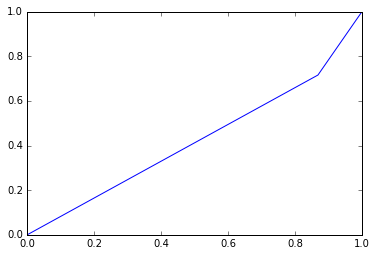

In [28]:
%matplotlib inline 
from sklearn import metrics 
import matplotlib.pyplot as plt 

print X.shape, y.shape 

tpr, fpr, __ = metrics.roc_curve( y, preds ) 

plt.plot( tpr, fpr ) 